nn array is [[  50 2450    1   49]
 [  51 2451    2    0]
 [  52 2452    3    1]
 ...
 [  47 2447 2498 2496]
 [  48 2448 2499 2497]
 [  49 2449 2450 2498]]


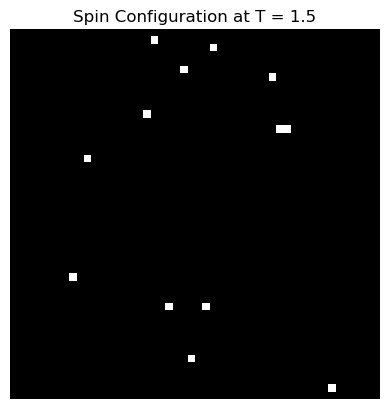

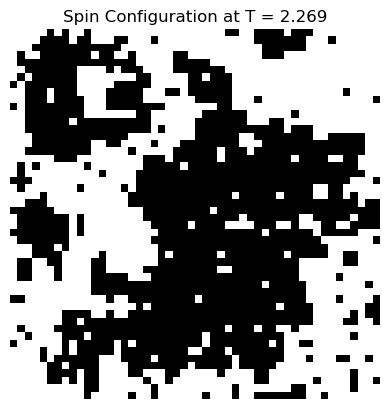

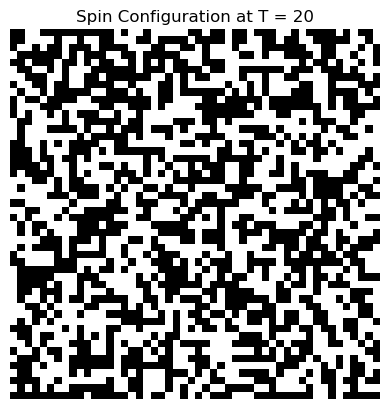

In [3]:
# ising
import numpy as np
import random
import matplotlib.pyplot as plt


#variable initialization 

J = 1 #spin interaction coefficient
B = 0 #meta 1 // External Magnetic Field
N = 50 # 50x50 grid
n = 700 # redommended 500-1000 
steps_tot = n*(N**2)
Nskip = 20 #vale to kai 20 meta
Ntherm = steps_tot//3 # throw 1/3 of total steps away
kb = 1 #eV/K
#T_values = np.linspace(1.5, 3.5, 20) # temperatures around curie
T_values = np.linspace(1.5, 3.5, 20) 
T_list =  [1.5 , 2.269, 20]

# aux matrices
aux1 = np.zeros((N**2, 2), dtype=int) # for saving the coordinates
aux2 = np.zeros((N, N), dtype=int) # map (ix,iy) --> index
nn = np.zeros((N**2, 4), dtype=int) # 4 nearest neighbors of each point

counter = 0 
for ix in np.arange(N):
    for iy in np.arange(N): # matching positions
        aux1[counter,0] = ix
        aux1[counter,1] = iy
        aux2[ix,iy] = counter
        counter += 1

#######################################################################

#periodic conditions
# function 1/3
def per(i,N):
    if i<0:
        return i + N
    elif i>N-1:
        return i - N
    return i


# creating the neigbors // calculating the 4 neighbors for each spin
for i in np.arange(N**2):
    ix=aux1[i,0]
    iy=aux1[i,1]
    ik=aux2[per(ix+1,N),per(iy,N)] # right
    nn[i,0]=ik
    ik=aux2[per(ix-1,N),per(iy,N)] # left
    nn[i,1]=ik
    ik=aux2[per(ix,N),per(iy+1,N)] # up
    nn[i,2]=ik
    ik=aux2[per(ix,N),per(iy-1,N)] # down
    nn[i,3]=ik
print(f'nn array is {nn}')

'''# Spin array --  Initial spin configuration
S = np.zeros([N**2])
for i in range(N**2):
    S[i] = np.random.choice([-1, 1]) # HOT START'''

'''COLD START
 S = np.ones([N**2])''' # all spins aligned

# Total energy calculation
# function 2/3
    
def Hamiltonian(J,B,nn,S): #total energy of the initial spin configuration
# use eq.5
    A = 0
    # S[i] intex of the choosen spin
    for i in range(N**2):
        A = A+S[i]*(S[nn[i,0]]+S[nn[i,1]]+S[nn[i,2]]+S[nn[i,3]]) # sum up the interactions of spin i with its neighbors
    H = -J*A/2-B*np.sum(S)
    return H


# Calculation of total energy difference when a spin flips
# function 3/3

def DeltaH(J,B,nn,S,r): # r -- spin index that we currently examine
    Q = 0
    # Q -- calculation of the sum of 4 geitonikwn spin in r position
    for i in range(4): # 4 neighbors for each spin
        geitonas = nn[r,i] 
        Q += S[geitonas]
    
    DH = 2*J*S[r]*(Q+B)
    return DH # return the energy difference if i reverse spin S[r] 


# Metropolis

for T in T_list:
    b = 1/(kb*T) # considering kb=1
    # Spin array --  Initial spin configuration
    S = np.random.choice([-1, 1], size=N**2)  
    Etot = []
    Magtot = []
    H1 = Hamiltonian(J,B,nn,S)

    for t in range(steps_tot):
        r = np.random.randint(0,N**2) # Choose spins to flip.
        DE1 = DeltaH(J,B,nn,S,r)

        if DE1 < 0: # energy is getting decreased // accept and flip
            H1 += DE1
            S[r] = -S[r] # spin flip
        if DE1 >= 0: # energy is getting increased // accept with proba
            Proba = np.exp(-DE1 * b) # importance sampling prin eixa /kbt
            if np.random.rand() < Proba:
                H1 += DE1
                S[r] = -S[r]  

        if t >= Ntherm and t % Nskip == 0: ## ??
            ## keeping only the calculations AFTER Ntherm
            Magtot.append(np.sum(S))
            Etot.append(H1)

    spin_image = (S.reshape(N, N) + 1) / 2  # μετατροπή -1 → 0 και +1 → 1
    plt.imshow(spin_image, cmap='gray', interpolation='nearest')
    plt.title(f"Spin Configuration at T = {T}")
    plt.axis('off')
    plt.show()
# first diagr T<Tc, ,second T=Tc, thrid T>Tc
# curie for kb=1 => T_c=2.269...